In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
X = np.arange(12)

In [3]:
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [4]:
Y = X.reshape((2, 2, 3))

In [5]:
print(Y)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [6]:
Y.ndim

3

In [7]:
X.reshape(-1, 2)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [8]:
# X.reshape(-1, 5)

**Difference between features and labels**

| Features                      | Labels                        |
|-------------------------------|-------------------------------|
| Input variables (X)           | Output variables (Y)          |

In [9]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([2.3, 4.1, 5.8, 8.5, 10.3, 12.1, 14.2, 15.6, 18.1, 20.4])

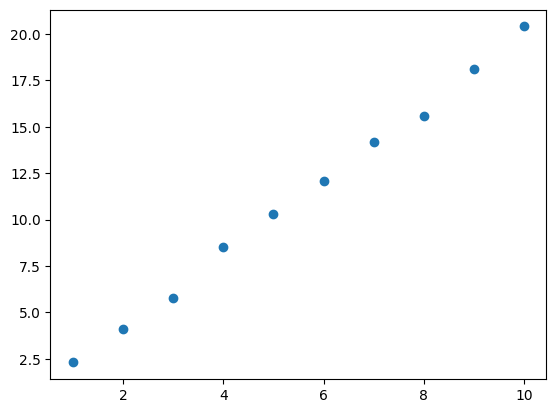

In [10]:
plt.scatter(X, Y)

**How to find linear relation?**

$`m = \frac {n \Sigma x_i y_i - \Sigma x_i \Sigma y_i} {n \Sigma x_i^2 - (\Sigma x_i)^2}`$
<br>
$`b = \frac {\Sigma y_i - m \Sigma x_i} {n}`$
<br>
Then we can use the straight line formula: $`y = mx + b`$

In [11]:
if len(X) == len(Y):
    n = len(X)
else:
    raise ValueError("X and Y should be of the same length")

In [12]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [13]:
nume = deno = 0

for i in range(n):
    nume += X[i] * (Y[i] - y_mean)
    deno += X[i] * (X[i] - x_mean)

m_new = nume / deno

In [14]:
b_new = y_mean - m_new * x_mean

In [15]:
sum_xi_yi = 0

for i in range(n):
    sum_xi_yi += X[i] * Y[i]

In [16]:
sum_xi_sum_yi = sum(X) * sum(Y)

In [17]:
sum_xi_xi = sum(i*i for i in X)

In [18]:
sum_xi_sum_xi = sum(X) * sum(X)

In [19]:
m = (n * sum_xi_yi - sum_xi_sum_yi) / (n * sum_xi_xi - sum_xi_sum_xi)

In [20]:
display(m)
display(m_new)

np.float64(1.9927272727272727)

np.float64(1.9927272727272725)

In [21]:
b = (sum(Y) - m * sum(X)) / n

In [22]:
display(b)
display(b_new)

np.float64(0.18000000000000113)

np.float64(0.1800000000000015)

In [23]:
regression_x = np.arange(0, 10, 0.2)

regression_y = np.array([m*x + b for x in regression_x])

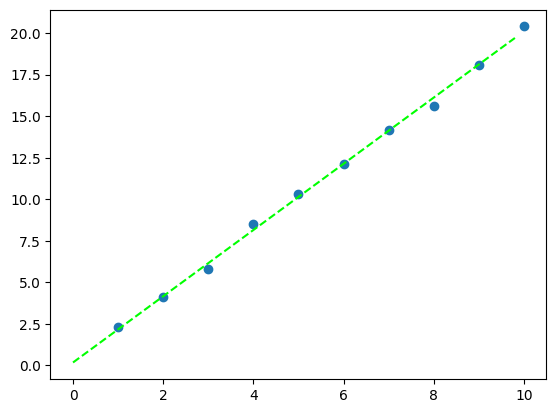

In [24]:
plt.plot(regression_x, regression_y, color='lime', linestyle='--')
plt.scatter(X, Y)

In [25]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [26]:
model.coef_

array([1.99272727])

In [27]:
model.intercept_

np.float64(0.1800000000000015)

In [28]:
def get_salary(years: float) -> float:
    return model.predict([[years]])

In [29]:
print(f"Salary: {get_salary(50)[0]:.2f}L")

Salary: 99.82L


In [30]:
study_hours = np.array([3, 7, 6, 8, 2])
marks = np.array([5.7, 8, 7, 9, 3])

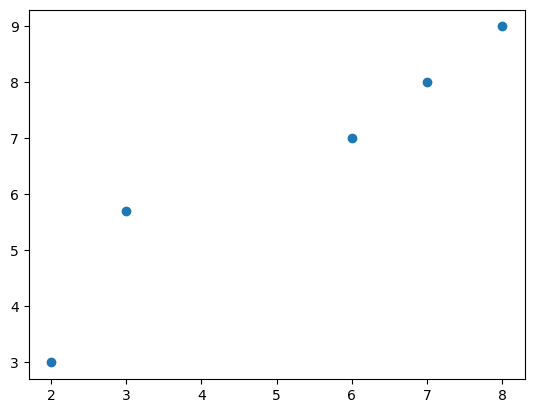

In [31]:
plt.scatter(study_hours, marks)

In [32]:
student_model = LinearRegression()

student_model.fit(study_hours.reshape(-1, 1), marks)

LinearRegression()

In [33]:
student_model.coef_

array([0.86044776])

In [34]:
student_model.predict([[10]])

array([10.67014925])

We will try to minimize the error of our predicted value and real value.

$`E = e_1 + e_2 + e_3 + ... + e_n`$

We take sum of the squares:

$`E = (e_1)^2 + (e_2)^2 + (e_3)^2 + ... + (e_n)^2`$<br>
$`E = \Sigma{(y_i - \hat{y}_i})^2`$